### Sample Clarius Analysis

In [1]:
import os
from pathlib import Path

print(Path().cwd())
os.chdir(Path().cwd().parent)
print(Path().cwd())

c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS\CLI-Demos
c:\0_Main\2_Quantitative_ultrasound\2_github\PyQuantUS


### Create raw from tar files

In [2]:
from pyquantus.parse.clarius import Clarius_tar_unpacker

tar_files_path = r'D:\Omid\0_samples\6_test_with_without_gain\10.02.2025'
extraction_mode = "single"  # "single", "multiple"
Clarius_tar_unpacker(tar_files_path, extraction_mode) 

2025-03-10 09:02:46,942 - INFO - No hidden files to delete.
2025-03-10 09:02:46,994 - INFO - Deleted folder: D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0.tar_extracted
2025-03-10 09:02:47,000 - INFO - Deleted folder: D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_1.tar_extracted
2025-03-10 09:02:47,006 - INFO - Deleted folder: D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_2.tar_extracted
2025-03-10 09:02:47,012 - INFO - Deleted folder: D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_3.tar_extracted
2025-03-10 09:02:47,463 - INFO - Extracted 'raw_0.tar' into 'D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0.tar_extracted'
2025-03-10 09:02:47,582 - INFO - Extracted 'raw_1.tar' into 'D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_1.tar_extracted'
2025-03-10 09:02:48,064 - INFO - Extracted 'raw_2.tar' into 'D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_2.tar_extracted'
2025-03-10 09:02:48,270 - INFO - Extract

### Select Image & Phantom and Parse

In [3]:
from pyquantus.parse.clarius import clarius_rf_parser

rf_path = r'D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0.tar_extracted\2025-01-28t07-20-59+0000_rf.raw'
rf_tgc_path = r'D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0.tar_extracted\2025-01-28T07-20-59+0000_env.tgc.yml'
info_path = r'D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0.tar_extracted\2025-01-28T07-20-59+0000_rf.yml'

imgData, imgInfo, refData, refInfo = clarius_rf_parser(rf_path, rf_tgc_path, info_path,
                                                       rf_path, rf_tgc_path, info_path)

The number of missing timestamps for D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0.tar_extracted\2025-01-28T07-20-59+0000_env.tgc.yml is: 34. Skipping this scan with current criteria.
A default TGC matrix of size (192, 2928, 34) is generated.
A default TGC matrix of size (192, 2928, 34) is generated.
The number of missing timestamps for D:\Omid\0_samples\6_test_with_without_gain\10.02.2025\raw_0.tar_extracted\2025-01-28T07-20-59+0000_env.tgc.yml is: 34. Skipping this scan with current criteria.
A default TGC matrix of size (192, 2928, 34) is generated.
A default TGC matrix of size (192, 2928, 34) is generated.


ValueError: too many values to unpack (expected 4)

# ROI Selection (from GUI)

In [ ]:
import pickle

pkl_name = '/Users/davidspector/Home/Stanford/QuantUS Projects/Sample Data/Clarius RF/a896ef50-1922-4df2-8995-a57b5a46d800/roi.pkl'

with open(pkl_name, 'rb') as f:
    roi_info = pickle.load(f)

In [ ]:
from pathlib import Path

assert roi_info['Image Name'] == Path(rf_path).name
assert roi_info['Phantom Name'] == Path(rf_path).name

In [ ]:
scSplineX = roi_info["Spline X"]
scSplineY = roi_info["Spline Y"]
frame = roi_info["Frame"]

# Analysis Config (from GUI)

In [ ]:
from pyquantus.utc import AnalysisConfig

config = AnalysisConfig()

config.transducerFreqBand = [0, 8000000] # [min, max] (Hz)
config.analysisFreqBand = [2000000, 6000000] # [lower, upper] (Hz)
config.samplingFrequency = 15000000 # Hz
config.axWinSize = 3.85 # axial length per window (mm)
config.latWinSize = 3.85 # lateral length per window (mm)
config.windowThresh = 0.95 # % of window area required to be considered in ROI
config.axialOverlap = 0.5 # % of window overlap in axial direction
config.lateralOverlap = 0.5 # % of window overlap in lateral direction
config.centerFrequency = 4000000 # Hz

# UTC Analysis

In [ ]:
from pyquantus.utc import UltrasoundImage

frame = 0

ultrasoundImage = UltrasoundImage()
ultrasoundImage.axialResRf = imgInfo.depth / imgData.rf[frame].shape[0]
ultrasoundImage.lateralResRf = ultrasoundImage.axialResRf * (
    imgData.rf[frame].shape[0]/imgData.rf[frame].shape[1]
) # placeholder
ultrasoundImage.bmode = imgData.bMode[frame]
ultrasoundImage.scBmode = imgData.scBmode[frame]
ultrasoundImage.phantomRf = refData.rf[0]
ultrasoundImage.rf = imgData.rf[frame]
ultrasoundImage.xmap = imgData.scBmodeStruct.xmap
ultrasoundImage.ymap = imgData.scBmodeStruct.ymap

In [ ]:
from pyquantus.utc import UtcAnalysis

utcAnalysis = UtcAnalysis()
utcAnalysis.ultrasoundImage = ultrasoundImage
utcAnalysis.config = config
utcAnalysis.initAnalysisConfig()
utcAnalysis.scSplineX = scSplineX
utcAnalysis.scSplineY = scSplineY

In [ ]:
utcAnalysis.refAttenuation = 0.5 # placeholder for attenuation coefficient at center freq (dB/cm/MHz)
utcAnalysis.refBackScatterCoef = 10e-3 # placeholder for backscatter coefficient at center freq (cm^-1 sr^-1)

In [ ]:
utcAnalysis.splineToPreSc()
utcAnalysis.generateRoiWindows()
utcAnalysis.computeUtcWindows()

0

In [ ]:
import numpy as np

mbfArr = [window.results.mbf for window in utcAnalysis.roiWindows]
ssArr = [window.results.ss for window in utcAnalysis.roiWindows]
siArr = [window.results.si for window in utcAnalysis.roiWindows]

print("Average Midband Fit:", np.mean(mbfArr), "dB")
print("Average Spectral Slope:", np.mean(ssArr), "dB/MHz")
print("Average Spectral Intercept:", np.mean(siArr), "dB")
print("Attenuation Coefficient:", utcAnalysis.attenuationCoef, "dB/cm/MHz")
print("Backscatter Coefficient:", utcAnalysis.backScatterCoef, "1/cm-sr")
print("w Nakagami Parameter:", utcAnalysis.nakagamiParams[0])
print("u Nakagami Parameter:", utcAnalysis.nakagamiParams[1])
print("Effective Scatterer Diameter:", utcAnalysis.effectiveScattererDiameter, "µm") 
print("Effective Scatterer Concentration:", utcAnalysis.effectiveScattererConcentration, "dB/mm^3")

Average Midband Fit: 0.0 dB
Average Spectral Slope: 0.0 dB/MHz
Average Spectral Intercept: 0.0 dB
Attenuation Coefficient: 0.5 dB/cm/MHz
Backscatter Coefficient: 0.01 1/cm-sr
w Nakagami Parameter: 87912.53929657763
u Nakagami Parameter: 0.8370525143260761
Effective Scatterer Diameter: 0.17673598070839378 µm
Effective Scatterer Concentration: 167.10417712573096 dB/mm^3


# Visualizations

In [ ]:
from pyquantus.utc import UtcData
from pyquantus.parse.objects import ScConfig

scConfig = ScConfig()
scConfig.width = imgInfo.width1
scConfig.tilt = imgInfo.tilt1
scConfig.startDepth = imgInfo.startDepth1
scConfig.endDepth = imgInfo.endDepth1

utcData = UtcData()
utcData.utcAnalysis = utcAnalysis
utcData.scConfig = scConfig

In [ ]:
utcData.convertImagesToRGB()

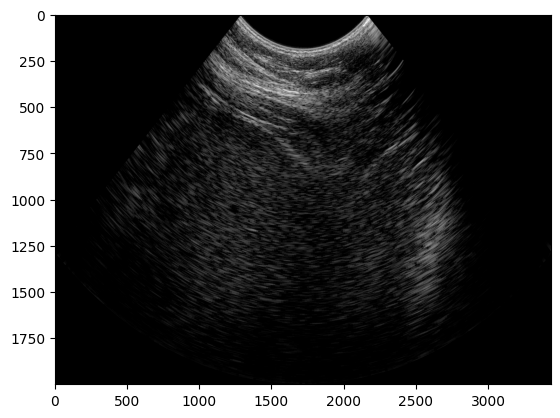

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(utcData.scBmode, aspect='auto')
# plt.plot(scSplineX, scSplineY)

In [ ]:
imgData.rf.shape

(30, 2928, 192)

In [ ]:
utcData.drawCmaps()
utcData.scanConvertCmaps()

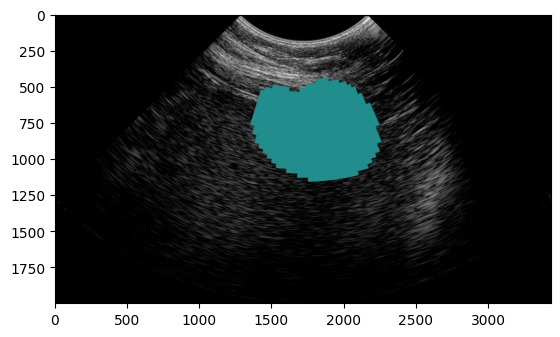

In [ ]:
# Note cmap is solid as image = phantom in this case
plt.imshow(utcData.scMbfIm) 